Import all the packages we will be using.

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Load all of the data we need.

In [6]:
jan_2019 = pd.read_csv(r"C:\Users\besso\Documents\Google Analytics Course\202101-divvy-tripdata.csv")
feb_2019 = pd.read_csv(r"C:\Users\besso\Documents\Google Analytics Course\202102-divvy-tripdata.csv")
mar_2019 = pd.read_csv(r"C:\Users\besso\Documents\Google Analytics Course\202103-divvy-tripdata.csv")
apr_2019 = pd.read_csv(r"C:\Users\besso\Documents\Google Analytics Course\202104-divvy-tripdata.csv")
may_2019 = pd.read_csv(r"C:\Users\besso\Documents\Google Analytics Course\202105-divvy-tripdata.csv")
jun_2019 = pd.read_csv(r"C:\Users\besso\Documents\Google Analytics Course\202106-divvy-tripdata.csv")
jul_2019 = pd.read_csv(r"C:\Users\besso\Documents\Google Analytics Course\202107-divvy-tripdata.csv")
aug_2019 = pd.read_csv(r"C:\Users\besso\Documents\Google Analytics Course\202108-divvy-tripdata.csv")
sep_2019 = pd.read_csv(r"C:\Users\besso\Documents\Google Analytics Course\202109-divvy-tripdata.csv")
oct_2019 = pd.read_csv(r"C:\Users\besso\Documents\Google Analytics Course\202110-divvy-tripdata.csv")
nov_2019 = pd.read_csv(r"C:\Users\besso\Documents\Google Analytics Course\202111-divvy-tripdata.csv")
dec_2019 = pd.read_csv(r"C:\Users\besso\Documents\Google Analytics Course\202112-divvy-tripdata.csv")

Observe the general info of each file to get a feel for the number of rows in each. Also check the column names within each file before we go about joining them all into one.

In [7]:
jan_2019.info()
feb_2019.info()
mar_2019.info()
apr_2019.info()
may_2019.info()
jun_2019.info()
jul_2019.info()
aug_2019.info()
sep_2019.info()
oct_2019.info()
nov_2019.info()
dec_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96834 entries, 0 to 96833
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ride_id             96834 non-null  object 
 1   rideable_type       96834 non-null  object 
 2   started_at          96834 non-null  object 
 3   ended_at            96834 non-null  object 
 4   start_station_name  88209 non-null  object 
 5   start_station_id    88209 non-null  object 
 6   end_station_name    86557 non-null  object 
 7   end_station_id      86557 non-null  object 
 8   start_lat           96834 non-null  float64
 9   start_lng           96834 non-null  float64
 10  end_lat             96731 non-null  float64
 11  end_lng             96731 non-null  float64
 12  member_casual       96834 non-null  object 
dtypes: float64(4), object(9)
memory usage: 9.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49622 entries, 0 to 49621
Data columns (total 13 colum

No potential issues found, combine all 12 files into 1 dataset.

In [8]:
data = pd.concat([jan_2019,feb_2019,mar_2019,apr_2019,may_2019,jun_2019,jul_2019,
           aug_2019,sep_2019,oct_2019,nov_2019,dec_2019], axis = 0)

Drop the columns with information we will not be using.

In [9]:
data = data.drop(columns = ['start_station_name','start_station_id',
                            'end_station_name','end_station_id',
                            'start_lat','start_lng','end_lat','end_lng'])  

Check for duplicate rows.

In [10]:
# define the duplicates
duplicates = data.duplicated()
# print them
data[duplicates]

,ride_id,rideable_type,started_at,ended_at,member_casual


None were found.

Check how many blank entries there are in the dataframe.

In [11]:
data.isna().sum()

ride_id          0
rideable_type    0
started_at       0
ended_at         0
member_casual    0
dtype: int64

There are none again.

Check for unusual entries in the categorical columns 'rideable_type' and 'member_casual'.

In [15]:
data.value_counts('rideable_type')

rideable_type
classic_bike     3251028
electric_bike    2031692
docked_bike       312343
dtype: int64

On closer thought about the bike types available, it is not clear what the difference between a 'classic' bike and a 'docked' bike is. For the bike-sharing company Cyclistic, a 'classic' bike will be docked at one of the docked stations anyway. There is no way for us to gain any further clarification on this, so I make the call that the 'docked' bikes should be treated as 'classic' bikes.

In [42]:
data.loc[data['rideable_type'] == 'docked_bike', ['rideable_type']] = 'classic_bike'

In [16]:
data.value_counts('member_casual')

member_casual
member    3066058
casual    2529005
dtype: int64

No unusual entries were found.

Convert the 'started_at' and 'ended_at' columns from object to datetime.

In [18]:
data['started_at'] = pd.to_datetime(data['started_at'])
data['ended_at'] = pd.to_datetime(data['ended_at'])

Add a new column giving the trip duration for each trip, in seconds.

In [19]:
data['trip_duration_seconds'] = (data['ended_at'] - data['started_at']).dt.total_seconds()

Check this new column for zero or negative values.

In [21]:
print(data[data['trip_duration_seconds'] <= 0])

                 ride_id  rideable_type          started_at  \
6592    FC1EFEF4475D7F56   classic_bike 2021-01-09 15:42:45   
35676   6B51296F8E269F2F   classic_bike 2021-01-15 16:40:47   
35752   B1235D38EB2F8A9E  electric_bike 2021-01-06 18:33:12   
60891   3F02776D0D38F96E   classic_bike 2021-01-29 21:02:41   
73012   417EE43395E20C71  electric_bike 2021-01-14 17:30:55   
...                  ...            ...                 ...   
226578  0A0682829241BE7E  electric_bike 2021-12-03 17:10:39   
231895  097BCE7BCAC82D5A  electric_bike 2021-12-31 17:24:52   
231938  7D9F6FD8AA55A78D  electric_bike 2021-12-05 11:41:27   
238328  B56D8E85B23B672F  electric_bike 2021-12-03 16:57:36   
239459  0491DF902148BE58  electric_bike 2021-12-09 19:01:40   

                  ended_at member_casual  trip_duration_seconds  
6592   2021-01-09 15:41:02        member                 -103.0  
35676  2021-01-15 16:40:47        member                    0.0  
35752  2021-01-06 18:31:07        member     

There are a number of such trips. Inspect a few of these entries closer, to see why this may have happened.

In [22]:
print(data.iloc[6592])
print(data.iloc[35676])

ride_id                     FC1EFEF4475D7F56
rideable_type                   classic_bike
started_at               2021-01-09 15:42:45
ended_at                 2021-01-09 15:41:02
member_casual                         member
trip_duration_seconds                 -103.0
Name: 6592, dtype: object
ride_id                     6B51296F8E269F2F
rideable_type                   classic_bike
started_at               2021-01-15 16:40:47
ended_at                 2021-01-15 16:40:47
member_casual                         member
trip_duration_seconds                    0.0
Name: 35676, dtype: object


Without further information, we cannot tell why these have occured. There are only 653 of these entries, out of a total 5595063. Since these entries make up a small proportion of the overall data, it is sensible to drop them.

In [25]:
# retrieve the indices of those entries we want to drop
trip_duration_drop_index = data[data['trip_duration_seconds'] <= 0].index
# drop them
data.drop(trip_duration_drop_index, inplace = True)

We must also check for extremely long trip durations. A quick box plot will show us the distribution of all of the trip durations. We use a log scale to be able to display both the longest and shortest trips on a single graph. We also separate into 'member' and 'casual' to see whether the majority of outliers belongs to one of these in particular.

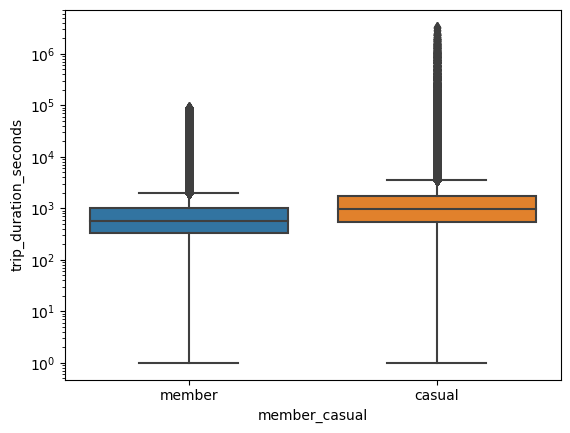

In [33]:
graph = sns.boxplot(x = 'member_casual', y = 'trip_duration_seconds', data = data)
graph.set_yscale('log')
plt.show()

We can see by the overlapping of outlier diamonds that there are lots of outliers. We should go further to see exactly how many outliers there are, before deciding what to do with them.

In [34]:
# check for the statistical outliers, using the interquartile range
quartile_75 = data['trip_duration_seconds'].quantile(.75)
quartile_25 = data['trip_duration_seconds'].quantile(.25)
iqr = quartile_75 - quartile_25
upper_threshold = quartile_75 + 1.5*iqr
# observe how many outliers there are
print(data[data['trip_duration_seconds'] > upper_threshold])

                 ride_id  rideable_type          started_at  \
5       5D8969F88C773979  electric_bike 2021-01-09 14:24:07   
132     0EDD906628861314   classic_bike 2021-01-22 20:54:49   
149     33A754F67BD337A7   classic_bike 2021-01-13 14:29:33   
175     2CE7583737A818C4   classic_bike 2021-01-04 14:03:49   
342     795E03AF09CE93F8   classic_bike 2021-01-21 11:13:36   
...                  ...            ...                 ...   
247438  568020D3A0F08B7F  electric_bike 2021-12-10 23:47:18   
247467  72DB1CFA499307C5  electric_bike 2021-12-04 08:20:04   
247484  03F076EF05431C27   classic_bike 2021-12-06 08:52:32   
247495  CF3BE5E8BA226DD5  electric_bike 2021-12-27 13:38:18   
247534  92BBAB97D1683D69  electric_bike 2021-12-24 15:42:09   

                  ended_at member_casual  trip_duration_seconds  
5      2021-01-09 15:17:54        casual                 3227.0  
132    2021-01-22 21:41:26        member                 2797.0  
149    2021-01-13 15:17:50        member     

This is about 7.3% of the total data we have, so we cannot simply drop the outliers. It could be argued that we drop just the most extreme outliers, but there is too much choice in how we decide which outliers are 'extreme'. Also notice that the longest trip durations for the casual riders are longer, so removing them would effect analyses when comparing casuals vs members. I have decided that we should keep all the outliers in, and when we analyse trip durations later on, we will do so by observing the median, and avoid using the mean or the maximum. This is because the median is less affected by outliers compared to the mean or the maximum.

Next, we move onto adding some new columns which will be useful to our analysis. Namely, columns giving the months and weekdays each ride started in.

In [ ]:
data['month'] = data['started_at'].dt.month
data['day_of_week'] = data['started_at'].dt.weekday